# Подготовил Долгушин Валерий Русланович, 156 группа

***В работе используется Python3 и языки разметки Markdown и LaTeX.***

## Таблица квантилей нормального распределения

In [101]:
from scipy.stats import norm
import pandas as pd
import numpy as np

In [102]:
quantiles = [round(float(norm.ppf(0.01 * x)), 2) for x in range(1, 100)]
probabilities = [0.01 * x for x in range(1, 100)]

**Составим таблицу квантилей нормального распределения, выведем несколько последних значений из таблицы.**

In [103]:
qnormframe = pd.DataFrame({'Quantile': quantiles,
                           'Probability': probabilities})
qnormframe.tail(10)

,Probability,Quantile
89,0.90,1.28
90,0.91,1.34
91,0.92,1.41
92,0.93,1.48
93,0.94,1.55
94,0.95,1.64
95,0.96,1.75
96,0.97,1.88
97,0.98,2.05
98,0.99,2.33


**Построим на графике несколько кривых соответствующих функциям плотности нормального распределения с разными параметрами $\mu, \sigma^2$.**

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

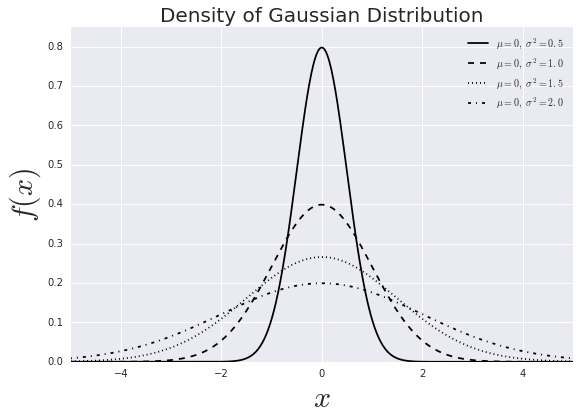

In [105]:
import numpy as np
from matplotlib import pyplot as plt

sigma_values = [0.5, 1.0, 1.5, 2.0]
linestyles = ['-', '--', ':', '-.']

mu = 0
x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots(figsize = (9, 6))

for sigma, ls in zip(sigma_values, linestyles):
    
    dist = norm(mu, sigma)
    plt.plot(x, dist.pdf(x), ls = ls, c = 'black', label = r'$\mu=%i,\ \sigma^2=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel(r'$x$', fontsize = 30)
plt.ylabel(r'$f(x)$', fontsize = 30)

plt.tick_params(top = 'off')
plt.title('Density of Gaussian Distribution', fontsize = 20)
plt.legend()

plt.show()

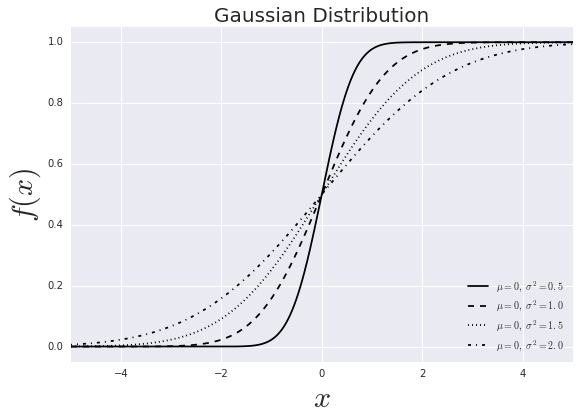

In [106]:
fig, ax = plt.subplots(figsize = (9, 6))

for sigma, ls in zip(sigma_values, linestyles):
    
    dist = norm(mu, sigma)
    plt.plot(x, dist.cdf(x), ls = ls, c = 'black', label = r'$\mu=%i,\ \sigma^2=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(-0.05, 1.05)

plt.xlabel(r'$x$', fontsize = 30)
plt.ylabel(r'$f(x)$', fontsize = 30)

plt.tick_params(top = 'off')
plt.title('Gaussian Distribution', fontsize = 20)
plt.legend(loc = 4)

plt.show()

# Зависимость случайных величин, коэффициенты корреляции
## Разложение Холецкого для нахождения зависимых величин

**Для генерации зависимых случайных величин будем использовать [разложение Холецкого](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A5%D0%BE%D0%BB%D0%B5%D1%86%D0%BA%D0%BE%D0%B3%D0%BE). Говоря простым языком: возьмем матрицу A так, чтобы она являлась корреляционной матрицей для четырех случайных величин. Разложим ее по Холецкому на $ A=UU^{'} $. Чтобы найти коррелированные величины выполним: $ X=Ux $, где $ x $ - это наши некоррелированые, но нормально распределенные случайные величины.**

In [107]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)

num_samples = 100
num_variables = 4
corr = [[1, 0.9, 0.9, 0.9], [0.9, 1, 0.9, 0.9], [0.9, 0.9, 1, 0.9], [0.9, 0.9, 0.9, 1]]

L = np.linalg.cholesky(corr)

In [108]:
uncorrelated = np.random.standard_normal((num_variables, num_samples))
mean = [1, 1, 1, 1]
correlated = np.dot(L, uncorrelated) + np.array(mean).reshape(4, 1)
pearson = np.corrcoef(correlated)
pearson

array([[ 1.        ,  0.91830405,  0.89599411,  0.90367035],
       [ 0.91830405,  1.        ,  0.89377744,  0.89678728],
       [ 0.89599411,  0.89377744,  1.        ,  0.87107549],
       [ 0.90367035,  0.89678728,  0.87107549,  1.        ]])

**Да, корреляции не равны $0.9$ в точности, но сейчас повторим операцию несколько раз для матрицы $А$ меньшей размерности, посмотрим на среднюю корреляцию, проверим гипотезу на равенство выборочного среднего $0.9$.**

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(15)

num_samples = 1000
num_variables = 2

corr = [[1, 0.9], [0.9, 1]]
mean = [1, 1]

L = np.linalg.cholesky(corr)

rhos = []

for i in range(1000):
    uncorrelated_ = np.random.standard_normal((num_variables, num_samples))
    correlated_ = np.dot(L, uncorrelated_) + np.array(mean).reshape(2, 1)
    X, Y = correlated_
    rhos.append(np.corrcoef(X, Y)[0, 1])

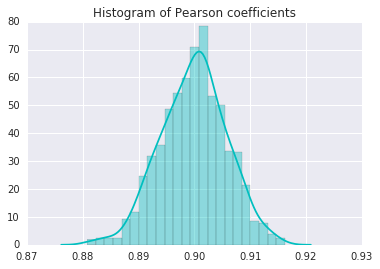

In [110]:
import seaborn as sns

sns.distplot(rhos, hist = True, kde = True, rug = False, color = 'c')
sns.plt.title('Histogram of Pearson coefficients')
sns.plt.show()

**Проверка гипотезы $ H_{0}=\mu =0.9 $
против альтернативы $ H_{1}\neq \mu \neq 0.9 $ использую Student's t-test:**

In [1]:
print('p-value = {0}'.format(stats.ttest_1samp(rhos, 0.9)[1]))

NameError: name 'stats' is not defined

**Так как $p-value =0.522$, то есть очень высокий (больше исторических критических значений типа $0.05, 0.01$ и etc.) значит мы не можем отвергнуть гипотезу о равенстве среднего генеральной совокупности числу $ \mu =0.9 $.**

In [112]:
taus, manr = [], []

for i in range(4):
    row_taus, row_manr = [], [] 
    for j in range(4):
        row_taus.append(round(float(stats.kendalltau(correlated[i], correlated[j])[0]), 8))
        row_manr.append(round(float(stats.spearmanr(correlated[i], correlated[j])[0]), 8))     
    taus.append(row_taus) 
    manr.append(row_manr)

In [113]:
taus = np.asarray(taus)
manr = np.asarray(manr)

**Выведем что-то вроде корреляционной матрицы, только для ранговых корреляций.**

In [114]:
print("""
Pearson 
{0}

Kendall's tau
{1}

Spearman 
{2}""".format(pearson, taus, manr))


Pearson 
[[ 1.          0.91830405  0.89599411  0.90367035]
 [ 0.91830405  1.          0.89377744  0.89678728]
 [ 0.89599411  0.89377744  1.          0.87107549]
 [ 0.90367035  0.89678728  0.87107549  1.        ]]

Kendall's tau
[[ 1.          0.73212121  0.69939394  0.7220202 ]
 [ 0.73212121  1.          0.70060606  0.6989899 ]
 [ 0.69939394  0.70060606  1.          0.65656566]
 [ 0.7220202   0.6989899   0.65656566  1.        ]]

Spearman 
[[ 1.          0.89710171  0.8749835   0.89449745]
 [ 0.89710171  1.          0.86671467  0.87205521]
 [ 0.8749835   0.86671467  1.          0.83879988]
 [ 0.89449745  0.87205521  0.83879988  1.        ]]


**Коэффициенты Спирмена и Пирсона очень схожи по значеням, а вот тау Кендалла значимо меньше их. Близкое значение коэффициентов корреляции Спирмена и Пирсона легко объясняются, ведь корр. Спирмена это корр. Пирсона, но только для рангов $r.v..$**

# Асимметрия и эксцесс
## Асимметрия

**Функция для генерации $r.v..$**

In [115]:
import scipy.special as sp

def dens(X, a):
    Y = 2 * np.exp(-X**2/2) / np.sqrt(2*np.pi)
    Y *= sp.ndtr(a * X)
    return Y

**Построим графики для разных случаев асимметрии.**

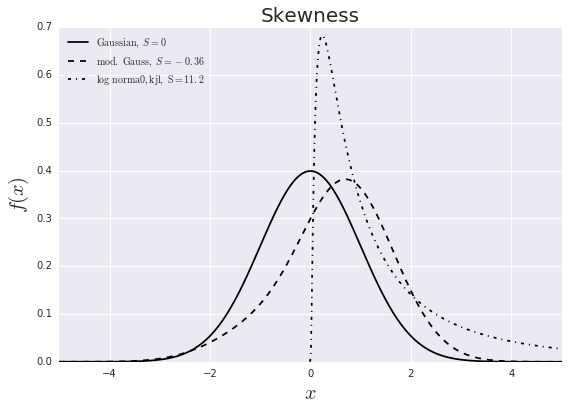

In [116]:
fig, ax = plt.subplots(figsize = (9, 6))
x = np.linspace(-8, 8, 1000)
N = stats.norm(0, 1)

plt.plot(x, N.pdf(x), '-k',
              label=r'${\rm Gaussian,}\ S=0$')

plt.plot(x, 0.5 * N.pdf(x) * (2 + x + 0.5 * (x * x - 1)),
              '--k', label=r'${\rm mod.\ Gauss,}\ S=-0.36$')

plt.plot(x[499:], stats.lognorm(1.2).pdf(x[499:]), '-.k',
              label=r'$\rm log\ norma0,kjl,\ S=11.2$')

plt.xlim(-5, 5)
plt.ylim(0, 0.7001)
plt.ylabel('$f(x)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 20)
plt.title('Skewness', fontsize = 20)

plt.legend(loc = 2)

**Здесь мы видим случай отрицательной асимметрии (изображен пунктирной линией). В качестве примера большой положительной асимметрии изображен график функции плотности логнормального распределения.**

## Эксцесс

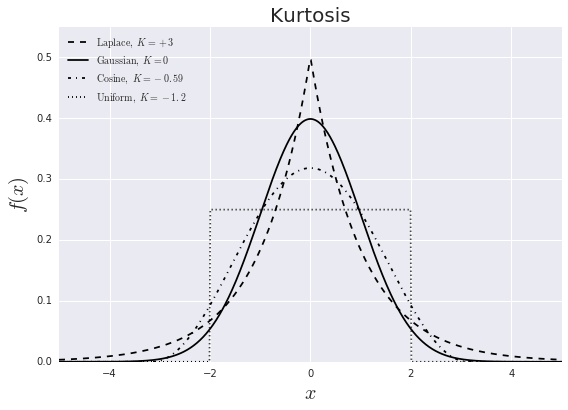

In [117]:
fig, ax = plt.subplots(figsize = (9, 6))

plt.plot(x, stats.laplace(0, 1).pdf(x), '--k',
              label=r'${\rm Laplace,}\ K=+3$')
plt.plot(x, stats.norm(0, 1).pdf(x), '-k',
              label=r'${\rm Gaussian,}\ K=0$')
plt.plot(x, stats.cosine(0, 1).pdf(x), '-.k',
              label=r'${\rm Cosine,}\ K=-0.59$')
plt.plot(x, stats.uniform(-2, 4).pdf(x), ':k',
              label=r'${\rm Uniform,}\ K=-1.2$')

plt.xlim(-5, 5)
plt.ylim(0, 0.55)
plt.xlabel('$x$', fontsize = 20)
plt.ylabel('$f(x)$', fontsize = 20)
plt.title('Kurtosis', fontsize = 20)

plt.legend(loc = 2)

plt.show()

**Распределение Лапласа имеет положительный эксцесс, равномерное распределение отрицательный эксцесс, косинусное распределение (аппроксимация нормального распределения) имеет эксцесс чуть меньше нуля. **

# Распределение Хи-квадрат

**Генерация r. v., функция построения графиков.**

In [118]:
x = np.linspace(0, 10, 1000)

def plot_chi(mu_values, x):
    linestyles = ['-', '--', ':', '-.']
    
    for mu, ls in zip(mu_values, linestyles):  
        dist = stats.chi2(mu)
        plt.plot(x, dist.pdf(x), ls = ls, c = 'black', label = r'$k=%i$' % (mu))

    plt.xlim(0, 10)
    plt.ylim(0, 0.85)

    plt.xlabel(r'$x$', fontsize = 30)
    plt.ylabel(r'$f(x)$', fontsize = 30)

    plt.tick_params(top = 'off')
    plt.title('Density of chi-squared distribution', fontsize = 20)
    plt.legend()

    plt.show()

**Строим графики распределения Хи-квадрат с разными значениями параметра степеней свободы.**

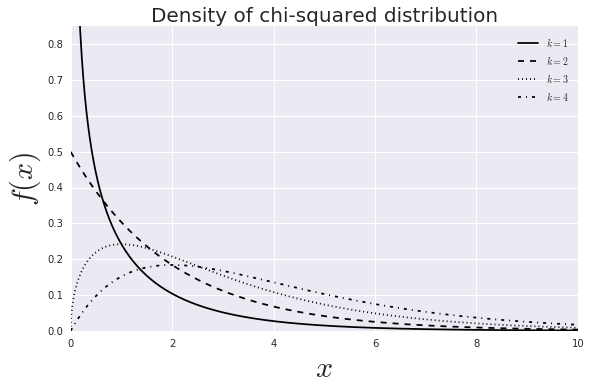

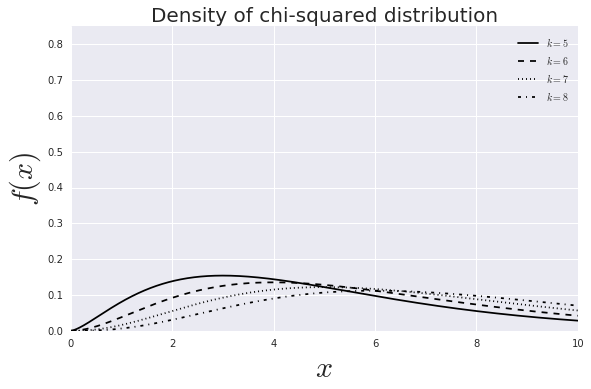

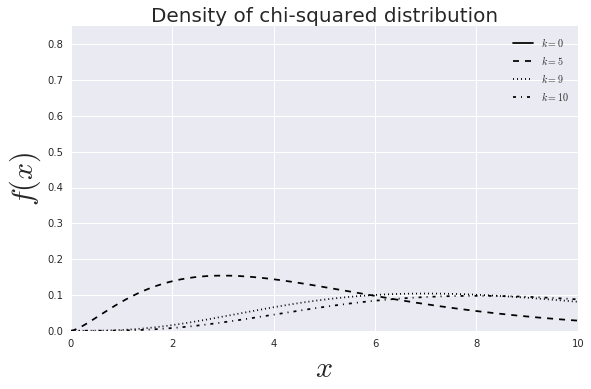

In [119]:
mu_values = [1, 2, 3, 4]
plt.subplots(figsize = (20, 12))
plt.subplot(221)
plot_chi(mu_values, x)

mu_values = [5, 6, 7, 8]
plt.subplots(figsize = (20, 12))
plt.subplot(222)
plot_chi(mu_values, x)

mu_values = [0, 5, 9, 10]
plt.subplots(figsize = (20, 12))
plt.subplot(223)
plot_chi(mu_values, x)

**Матожидание и дисперсия для распределения Хи-квадрат.**

In [120]:
chim = [i for i in range(11)]
chiv = [i*2 for i in chim]

chi = pd.DataFrame({'$Expectation=k$': chim,
                    '$Variance=2k$': chiv})
chi

,$Expectation=k$,$Variance=2k$
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
5,5,10
6,6,12
7,7,14
8,8,16
9,9,18


# Биномиальное распределение

**Построим функцию плотности для биномиального распределения.**

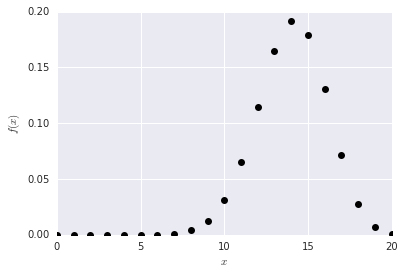

In [121]:
binom = stats.binom(20, 0.7)

x = np.linspace(0, 20, 21)
plt.plot(x, binom.pmf(x), 'o', c = 'black')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

**Матожидание и дисперсия для биномиального распределения. n = столбец индексов, p = 0.5, q = 0.5.**

In [122]:
n = [i for i in range(11)]
np_ = [i*0.5 for i in n]
npq_ = [i*0.5 for i in np_]
binomial = pd.DataFrame({'$Expectation=np$': np_,
                    '$Variance=npq$': npq_})
binomial

,$Expectation=np$,$Variance=npq$
0,0.0,0.00
1,0.5,0.25
2,1.0,0.50
3,1.5,0.75
4,2.0,1.00
5,2.5,1.25
6,3.0,1.50
7,3.5,1.75
8,4.0,2.00
9,4.5,2.25


# Распределение Бернулли

**Распределение Бернулли с параметрами $p=0.6$ и $q=1-p=0.4$.**

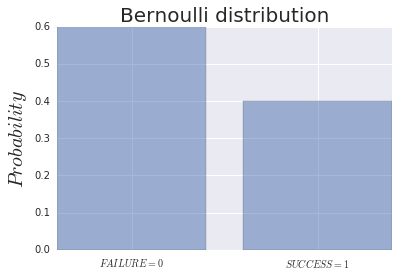

In [123]:
objects = ['$FAILURE=0$', '$SUCCESS=1$']
y_pos = np.arange(len(objects))
performance = [0.6, 0.4]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('$Probability$', fontsize = 20)
plt.title('Bernoulli distribution', fontsize = 20)
 
plt.show()

**Матожидание и дисперсия для распределения Бернулли с разными значениями параметра $p$.**

In [124]:
p = [i*0.1 for i in range(11)]
pq = [i*(1-i) for i in p]
bern = pd.DataFrame({'$Expectation=p$': p,
                    '$Variance=p*(1-p)=pq$': pq})
bern

,$Expectation=p$,$Variance=p*(1-p)=pq$
0,0.0,0.00
1,0.1,0.09
2,0.2,0.16
3,0.3,0.21
4,0.4,0.24
5,0.5,0.25
6,0.6,0.24
7,0.7,0.21
8,0.8,0.16
9,0.9,0.09
